Virtual Machine (VM) Setup
=========================
Introduction
-------------------------

This tutorial is designed to familiarize you with the analysis environment (the **container**) that we have set up for use in the Summer School. We will describe the setup of your environment and how to get started with using it. We'll also discuss some of pros & cons of using this setup both here and after you leave the Summer School.

**Goal:**  *Set up a virtual environment; understand how it interfaces with the rest of your system*

Getting Started
-------------------

The Fermi Science Support Center (FSSC) has developed an analysis environment for your use. It contains all of the software tools you will need to participate in the various walkthroughs in the Summer School and perform your own analyses. 

The software, instructions on getting started, and iPhython notebooks that we'll be following during the school are all on GitHub at:

https://github.com/fermi-lat/FermiBottle

Terms
-------------------

Host OS - The operating system of the physical machine (host) that the container is running on. When you turn your computer on, this is the OS it boots into and where Docker is installed.

Container - A self-contained operating system running inside the Docker program that has all of the analysis software (FermiTools, Fermipy, GBM Data Tools, etc.) that you will need for the Summer School.

Shared directory - Your **ONLY** way into the container from the host OS. The location of this directory on your host OS is where you execute the `docker create` command. From within the container itself, this directory will *always* be at `/data`.

How to think about the container
-------------------

The container is a complete Linux operating system that comes with all of the analysis tools you will need during the Summer School pre-installed. This enables you to focus on learniing gamma-ray analysis rather than spending 2 weeks debugging package installation conflicts :)

Advantages:
- Easier installation procedure.
- The same environment can be installed on any system 
- Installation is not OS or hardware-dependant.
- All tools are fully-functional for doing science.
- Work done in the **shared directory** in your container will be accessible from your host OS.

Disadvantages:
- Work done *outside* the shared directory in your container will **NOT** be accessible from your host OS.
- The resources being usedd to run the container are not available for analysis.
- Analyses that require a lot of memory require extra setup steps.
- You likely won't need all of the tools installed in the container for your own analysis.
- The container is not updated when new versions of the software within it are released.
- The container is an extra layer of abstraction that you need to be cognizant of. *Keep this in mind as your projects get more advanced.*

In [1]:
# Let's make a visual aid
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<Figure size 2000x2000 with 0 Axes>

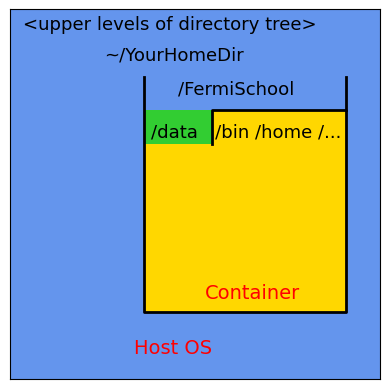

In [2]:
fig = plt.figure(figsize=(20, 20), facecolor='w')
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0,11)
ax.set_ylim(0,11)
ax.set_facecolor("cornflowerblue")
ax.tick_params(left = False, bottom = False)
ax.set_yticklabels([])
ax.set_xticklabels([])
square = plt.Rectangle((4,2), 6, 6, fc='gold',ec="none")
rectangle = plt.Rectangle((4,7), 2, 1, fc='limegreen',ec="none")
plt.gca().add_patch(square)
plt.gca().add_patch(rectangle)
x1 = np.array([4,4, 10, 10, 6, 6])
y1 = np.array([9,2, 2, 8, 8, 7])
x2 = np.array([10,10])
y2 = np.array([8,9])
plt.plot(x1, y1, x2, y2, linewidth = '2', color = 'k')
plt.text(0.4,10.4,"<upper levels of directory tree>",fontsize=13)
plt.text(2.8,9.5,"~/YourHomeDir",fontsize=13)
plt.text(5,8.5,"/FermiSchool",fontsize=13)
plt.text(4.2,7.2,"/data   /bin /home /...",fontsize=13)
plt.text(5.8,2.4,"Container",fontsize=14,color='r')
plt.text(3.7,0.75,"Host OS",fontsize=14,color='r')
plt.show()

When you create a container, note the directory in which you run the `docker create` command. This directory is your "doorway" into your container. Every time you (re)start the container, regardless of where you do it from, this directory will be the only way in. In this example that directory is called `/FermiSchool`, but you can name it whatever you want.

Inside each container is a directory called `/data`. You can navigate to it using the following command *in the container terminal*:

`cd /data`

The content in the `/data` directory (and sub-directories thereof) in your container is fully accessible in the `/FermiSchool` directory in your host OS, and *vice versa*. Files & folders stored or created in this branch of the directory tree will not be lost if the container is shut down or deleted.

You can start multiple containers from the same directory on your host system. This could be usefull if, for example, the original container stops working correctly and you need to create a new one but don't want redo your analysis.